In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df = pd.read_csv('mnist.csv')

In [39]:
df.shape

(42000, 785)

In [40]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21121,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


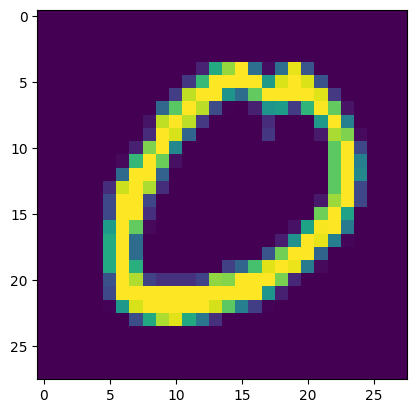

In [41]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [42]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape

(33600, 784)

In [45]:
X_test.shape

(8400, 784)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

6.12394380569458


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [54]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [58]:
X_train_pca.shape

(33600, 100)

In [59]:
X_test_pca.shape

(8400, 100)

In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [62]:
import time
start = time.time()
y_pred_pca = knn.predict(X_test_pca)
print(time.time() - start)

0.5850708484649658


In [63]:
accuracy_score(y_test, y_pred_pca)

0.9525

In [64]:
pca = PCA(n_components=2)
X_train_pca2 = pca.fit_transform(X_train)
X_test_pca2 = pca.transform(X_test)

In [65]:
X_train_pca2

array([[-2.71860962, -0.48989415],
       [-0.67693792, -6.75394086],
       [-3.03326852,  6.50998714],
       ...,
       [ 2.14884137,  0.78076848],
       [ 1.05958479,  0.94763317],
       [17.70265646,  1.96132051]])

/var/folders/c7/1v5wlgds2rjfw4_ldh17bj3h0000gn/T/ipykernel_2045/3924613495.py:7: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



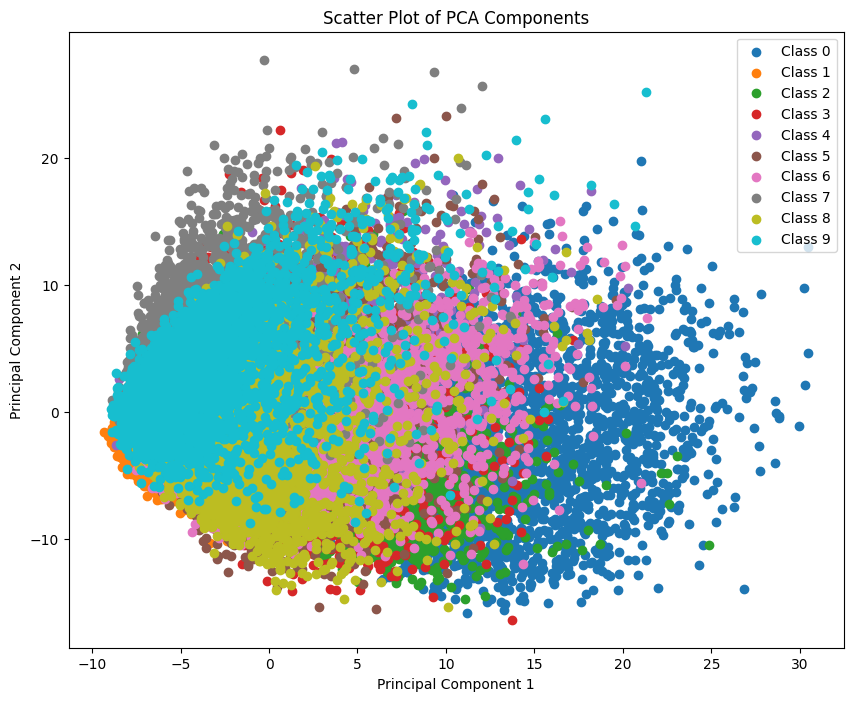

In [72]:
import matplotlib.pyplot as plt

color_map = {str(i): plt.cm.tab10(i) for i in range(10)}

plt.figure(figsize=(10, 8))
for class_label in color_map:
    plt.scatter(X_train_pca2[y_train == int(class_label), 0],  
                X_train_pca2[y_train == int(class_label), 1],  
                c=color_map[class_label], 
                label=f'Class {class_label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA Components')
plt.legend()
plt.show()

In [74]:
pca = PCA(n_components=3)
X_train_pca2 = pca.fit_transform(X_train)
X_test_pca2 = pca.transform(X_test)

/var/folders/c7/1v5wlgds2rjfw4_ldh17bj3h0000gn/T/ipykernel_2045/2751163804.py:10: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



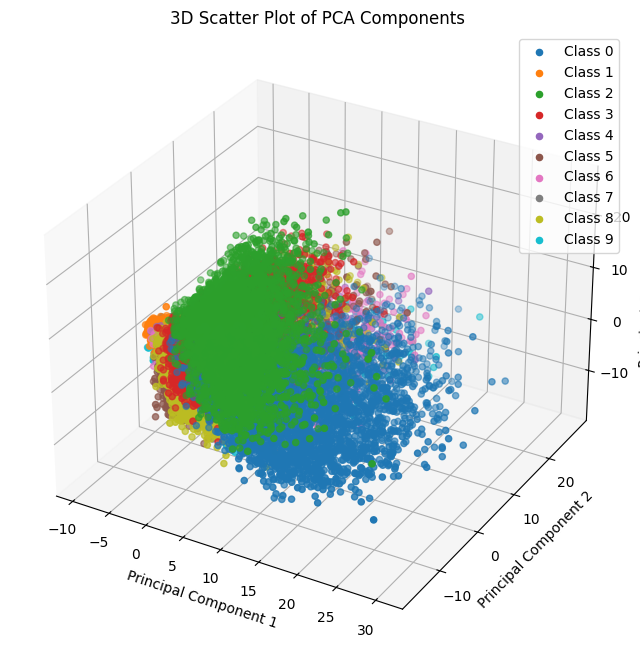

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

color_map = {str(i): plt.cm.tab10(i) for i in range(10)}

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for class_label in color_map:
    ax.scatter(X_train_pca2[y_train == int(class_label), 0], 
               X_train_pca2[y_train == int(class_label), 1],  
               X_train_pca2[y_train == int(class_label), 2],  
               c=color_map[class_label], 
               label=f'Class {class_label}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Components')
ax.legend()
plt.show()

In [89]:
pca.explained_variance_

array([40.67111197, 29.17023391, 26.74459572])

In [90]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [91]:
pca.components_.shape

(3, 784)

In [92]:
pca.components_

array([[-4.35284114e-19,  1.02954642e-18, -9.27062468e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-4.98906576e-18,  8.38796250e-17,  3.36439618e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.94671820e-17, -6.39890082e-17, -9.68909855e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [93]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [95]:
pca.explained_variance_.shape

(784,)

In [96]:
pca.components_.shape

(784, 784)

In [97]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

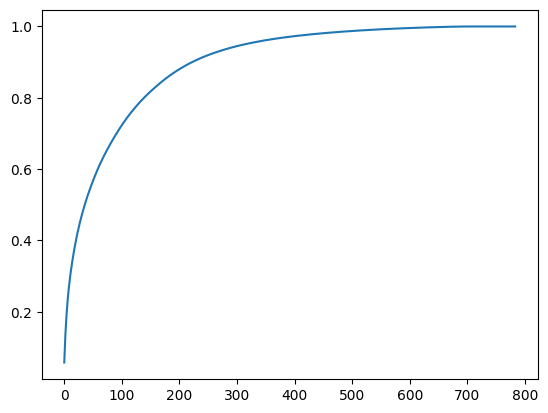

In [99]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))